In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import sigmoid_kernel
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend
from keras.layers import Dense
from keras.models import load_model, Sequential
from sklearn.metrics import roc_curve, auc
import keras as keras
from sklearn.metrics import confusion_matrix

# tWZ-ttZ

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [29]:
df1 = pd.read_csv('tWZ+ttZ (1).csv')#
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']

#X1 = X1.drop(['delPhi_0_lep_MET','MET','num_jets','num_bjets','num_fake_leps','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#	mu_pt_1	mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [30]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.6, test_size=0.4, shuffle=True)
X1_test, X1_val, y1_test, y1_val = train_test_split(X1_test,y1_test, train_size=0.5, test_size=0.5, shuffle=True)

In [25]:
scaler1 = StandardScaler()
scaler_train1 = scaler1.fit(X1_train)
X1_train = scaler1.transform(X1_train)
scaler_test1 = scaler1.fit(X1_test)
X1_test = scaler1.transform(X1_test)
scaler_val1 = scaler1.fit(X1_val)
X1_val = scaler1.transform(X1_val)

## Defining the Model

In [17]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.5,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model = Sequential()
model.add(Dense(X1.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(int(X1.shape[1]/4), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(int(X1.shape[1]/2), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history1 = model.fit(X1_train, y1_train, epochs=20, validation_data=(X1_val, y1_val), callbacks=None)
model.summary()

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6330 - loss: 0.6477 - mae: 0.4426 - val_accuracy: 0.7955 - val_loss: 0.4538 - val_mae: 0.3127
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7739 - loss: 0.4802 - mae: 0.3276 - val_accuracy: 0.8048 - val_loss: 0.4249 - val_mae: 0.2887
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4475 - mae: 0.3043 - val_accuracy: 0.8045 - val_loss: 0.4221 - val_mae: 0.2880
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 0.4414 - mae: 0.3008 - val_accuracy: 0.8045 - val_loss: 0.4205 - val_mae: 0.2852
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7889 - loss: 0.4426 - mae: 0.3011 - val_accuracy: 0.8048 - val_loss: 0.4203 - val_mae: 0.2866
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4334 - mae: 0.2936 - val_accuracy: 0.8055 - val_loss: 0.4201 - val_mae: 0.2856
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 17)                    │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 17)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 4)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 8)                     │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 8)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 1)                     │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 856 (3.35 KB)

In [38]:
y_pred1 = model.predict(X1_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
signal, bg0 = [],[]
j = 0
for index in y1_test.index:
    if y1_test[index] == 0:
        bg0.append(float(y_pred1[j][0]))
    else:
        signal.append(float(y_pred1[j][0]))
    j+=1

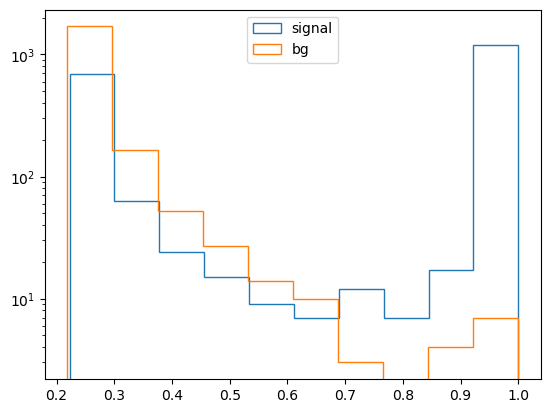

In [40]:
plt.hist(signal, histtype='step', label='signal')
plt.hist(bg0, histtype='step', label='bg')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

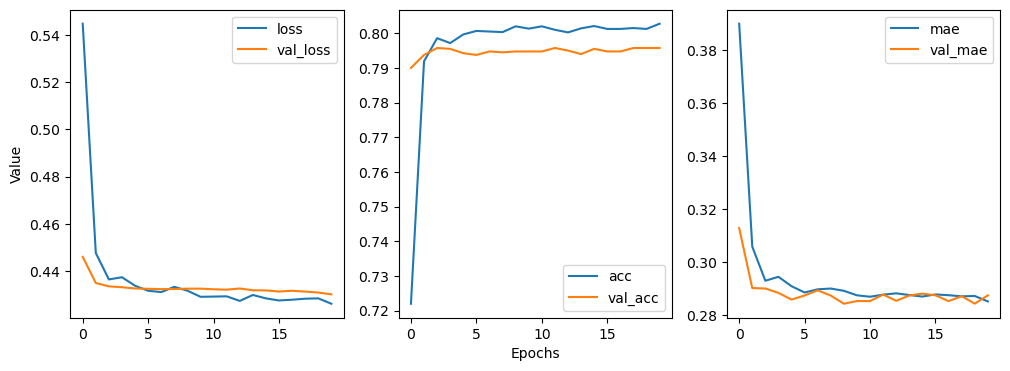

In [41]:
params1 = pd.DataFrame(history1.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params1['loss'], label='loss')
ax1.plot(params1['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params1['accuracy'], label='acc')
ax2.plot(params1['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params1['mae'], label='mae')
ax3.plot(params1['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

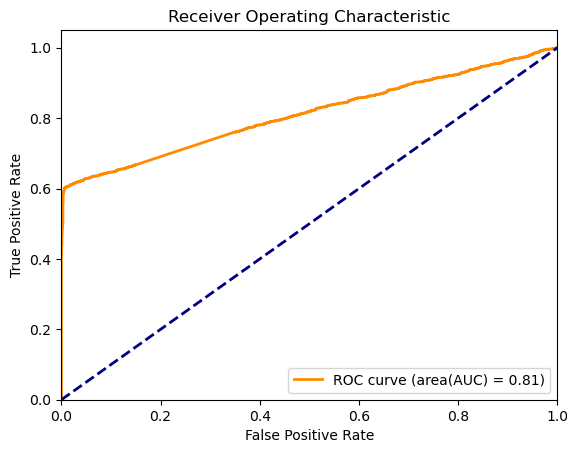

0.8112609142559104


In [42]:
fpr, tpr, _ = roc_curve(y1_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# ttZ-vs-Background Classification

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [51]:
df2 = pd.read_csv('ttZ+bkg.csv')#
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']

X2 = X2.drop(['delPhi_0_lep_MET','MET','num_jets','num_bjets','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#,'mu_pt_1',mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, train_size=0.6, test_size=0.4, shuffle=True)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_test,y2_test, train_size=0.5, test_size=0.5, shuffle=True)

In [53]:
scaler2 = StandardScaler()
scaler_train2 = scaler2.fit(X2_train)
X2_train = scaler2.transform(X2_train)
scaler_test = scaler2.fit(X2_test)
X2_test = scaler2.transform(X2_test)
scaler_val2 = scaler2.fit(X2_val)
X2_val = scaler2.transform(X2_val)

## Defining the Model

In [54]:
history2 = model.fit(X2_train, y2_train, epochs=20, validation_data=(X2_val, y2_val), callbacks=None)
model.summary()

Epoch 1/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4338 - loss: 1.2843 - mae: 0.5475 - val_accuracy: 0.8320 - val_loss: 0.3608 - val_mae: 0.2716
Epoch 2/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8162 - loss: 0.3712 - mae: 0.2633 - val_accuracy: 0.8545 - val_loss: 0.2781 - val_mae: 0.1990
Epoch 3/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8264 - loss: 0.3219 - mae: 0.2251 - val_accuracy: 0.8593 - val_loss: 0.2619 - val_mae: 0.1867
Epoch 4/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8330 - loss: 0.3015 - mae: 0.2111 - val_accuracy: 0.8615 - val_loss: 0.2558 - val_mae: 0.1831
Epoch 5/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8343 - loss: 0.2970 - mae: 0.2084 - val_accuracy: 0.8618 - val_loss: 0.2515 - val_mae: 0.1792
Epoch 6/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8350 - loss: 0.2898 - mae: 0.2019 - val_accuracy: 0.8635 - val_loss: 0.2482 - val_mae: 0.1767
Epoch 7/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (32, 17)                    │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 17)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (32, 4)                     │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 4)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (32, 8)                     │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 8)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 1)                     │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 856 (3.35 KB)

In [55]:
y_pred2 = model.predict(X2_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [56]:
bg1, bg2 = [],[]
j = 0
for index in y2_test.index:
    if y2_test[index] == 0:
        bg2.append(float(y_pred2[j][0]))
    else:
        bg1.append(float(y_pred2[j][0]))
    j+=1

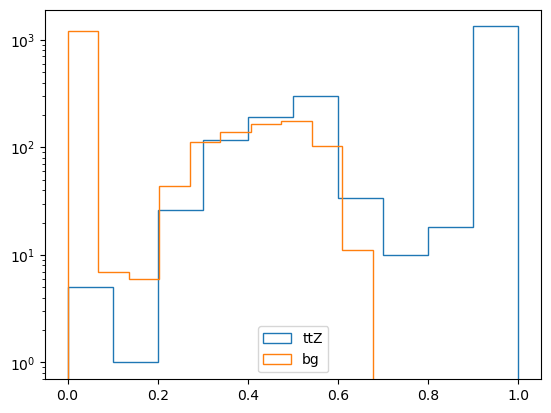

In [57]:
plt.hist(bg1, histtype='step', label='ttZ')
plt.hist(bg2, histtype='step', label='bg')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

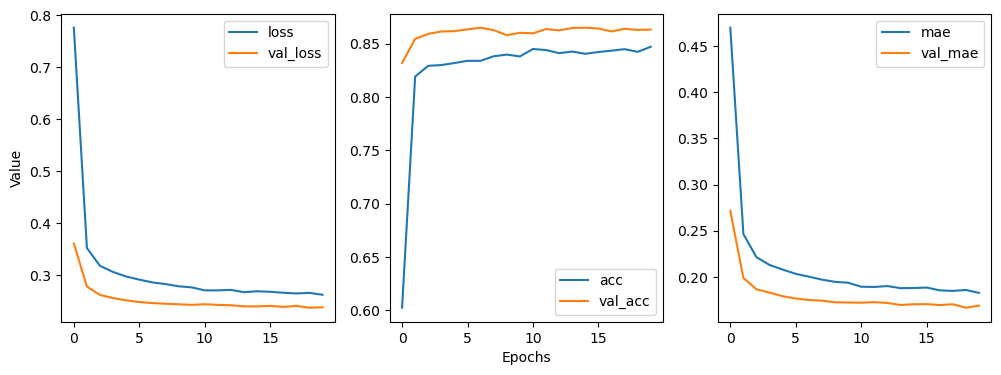

In [58]:
params2 = pd.DataFrame(history2.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params2['loss'], label='loss')
ax1.plot(params2['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params2['accuracy'], label='acc')
ax2.plot(params2['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params2['mae'], label='mae')
ax3.plot(params2['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

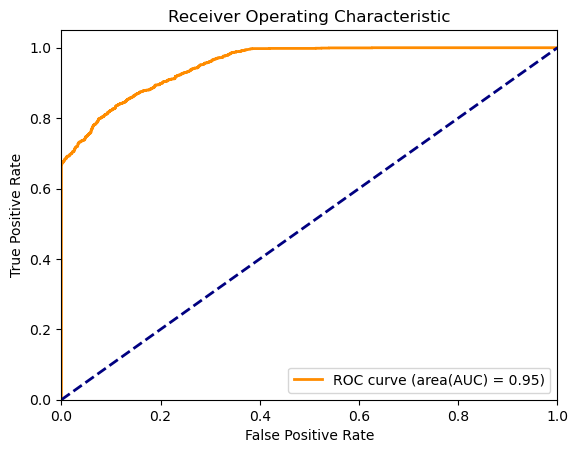

0.9523896693362343


In [59]:
fpr, tpr, _ = roc_curve(y2_test, y_pred2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# tWZ -vs- All Background

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [69]:
df0, df_ = pd.read_csv('ttZ+bkg.csv'), pd.read_csv('tWZ+ttZ (1).csv')#
df = pd.concat([df0, df_])
df = df.dropna()
df = df.drop(['num_fake_leps','delPhi_0_lep_MET','MET','num_jets','num_bjets','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#,'mu_pt_1',mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label
X = df.drop(['label'], axis=1)
y = df['label']

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.6, test_size=0.4, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, train_size=0.5, test_size=0.5, shuffle=True)

In [71]:
scaler = StandardScaler()
scaler_train = scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler_test = scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler_val = scaler2.fit(X_val)
X_val = scaler.transform(X_val)

## Defining the Model

In [72]:
"""callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model0 = Sequential()
model0.add(Dense(30, activation='relu'))
model0.add(Dense(40, activation='relu'))
model0.add(Dense(10, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])"""
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=None)
model.summary()

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.4204 - mae: 0.2849 - val_accuracy: 0.7968 - val_loss: 0.4340 - val_mae: 0.2876
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7981 - loss: 0.4312 - mae: 0.2903 - val_accuracy: 0.7968 - val_loss: 0.4341 - val_mae: 0.2872
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8016 - loss: 0.4285 - mae: 0.2887 - val_accuracy: 0.7970 - val_loss: 0.4351 - val_mae: 0.2866
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4266 - mae: 0.2875 - val_accuracy: 0.7970 - val_loss: 0.4347 - val_mae: 0.2877
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8064 - loss: 0.4242 - mae: 0.2856 - val_accuracy: 0.7962 - val_loss: 0.4346 - val_mae: 0.2876
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8009 - loss: 0.4260 - mae: 0.2883 - val_accuracy: 0.7970 - val_loss: 0.4338 - val_mae: 0.2888
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (32, 17)                    │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 17)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (32, 4)                     │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 4)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (32, 8)                     │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 8)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 1)                     │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 856 (3.35 KB)

In [74]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [75]:
signal, bg = [],[]
j = 0
for index in y_test.index:
    if y_test[index] == 0:
        bg.append(float(y_pred[j][0]))
    else:
        signal.append(float(y_pred[j][0]))
    j+=1

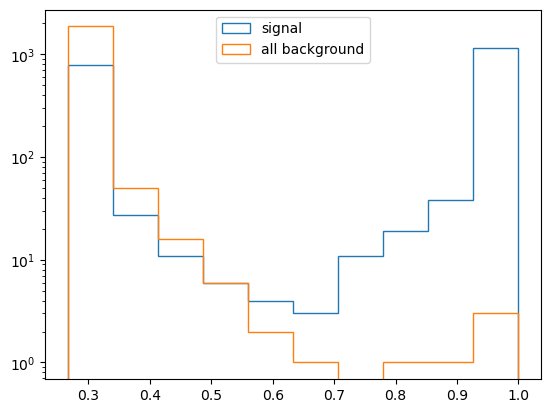

In [76]:
plt.hist(signal, histtype='step', label='signal')
plt.hist(bg, histtype='step', label='all background')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

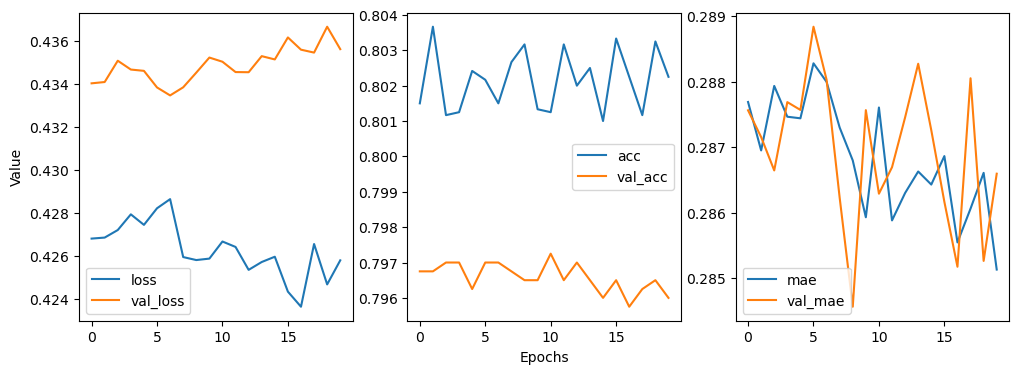

In [77]:
params = pd.DataFrame(history.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params['loss'], label='loss')
ax1.plot(params['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params['accuracy'], label='acc')
ax2.plot(params['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params['mae'], label='mae')
ax3.plot(params['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

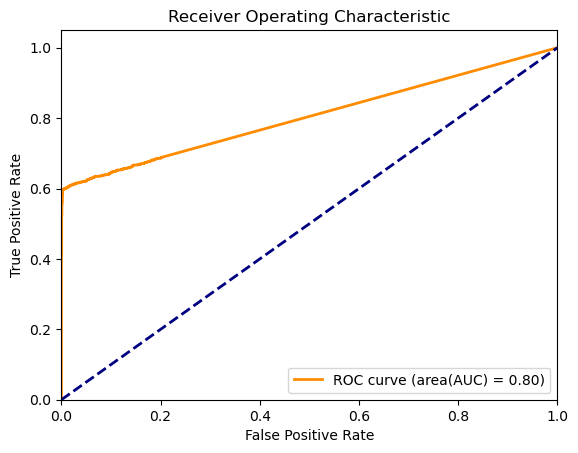

0.8037876172607881


In [78]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# Git Repository Stuff

In [137]:
!git config --global user.email "ltskar009@myuct.ac.za"

In [138]:
!git add .

In [139]:
!git commit -m "Add Jupyter Notebook"

[main 1ffe17a] Add Jupyter Notebook
 1 file changed, 72 insertions(+), 66 deletions(-)


In [140]:
!git push

To https://github.com/KaraboLetsholo/3rd-Year-Project-.git
   09faa3b..1ffe17a  main -> main


In [141]:
!git commit -m "selection criteria"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


# Selection Criteria

In [2]:
select = pd.read_csv('tWZ+ttZ (1).csv')#
slc_X = select.drop(['label'], axis=1)
slc_y = select['label']

In [39]:
slc_X_train, slc_X_test, slc_y_train, slc_y_test = train_test_split(slc_X, slc_y, train_size=0.75, test_size=0.25, shuffle=True)
#slc_X_test, slc_X_val, slc_y_test, slc_y_val = train_test_split(slc_X_test, slc_y_test, train_size=0.5, test_size=0.5, shuffle=True)

slc_scaler = StandardScaler()
scaler_train_slc = slc_scaler.fit(slc_X_train)
slc_X_train = slc_scaler.transform(slc_X_train)
scaler_test_slc = slc_scaler.fit(slc_X_test)
slc_X_test = slc_scaler.transform(slc_X_test)
#scaler_val1 = slc_scaler.fit(slc_X_val)
#slc_X_val = slc_scaler.transform(slc_X_val)
slc_X_train

mm_scaler = sk.preprocessing.MinMaxScaler()
mm_X_train = mm_scaler.fit_transform(slc_X_train)
mm_X_test = mm_scaler.fit_transform(slc_X_test)
len(slc_X_train[:,1])#slc_y_train)#slc_X_train[0][:])
#slc_X_train.shape

15000

In [117]:
names =  slc_X.columns
losses = []#np.array(len(names),2)

slc_model = Sequential()
slc_model.add(Dense(1, activation='relu'))
slc_model.add(Dropout(0.1))
slc_model.add(Dense(1, activation='relu'))
slc_model.add(Dropout(0.1))
slc_model.add(Dense(1, activation='relu'))
slc_model.add(Dropout(0.1))
slc_model.add(Dense(1, activation='sigmoid'))
slc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])

for i in range(0,len(names)):
    slc_history =  slc_model.fit(slc_X_train[:,i:i+1], slc_y_train, epochs=20, validation_data=(slc_X_test[:,i], slc_y_test), verbose=0)
    slc_pred =  slc_model.predict(slc_X_test[:,i])
    losses.append([names[i], sk.metrics.log_loss(slc_y_test, slc_pred)])
    

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 

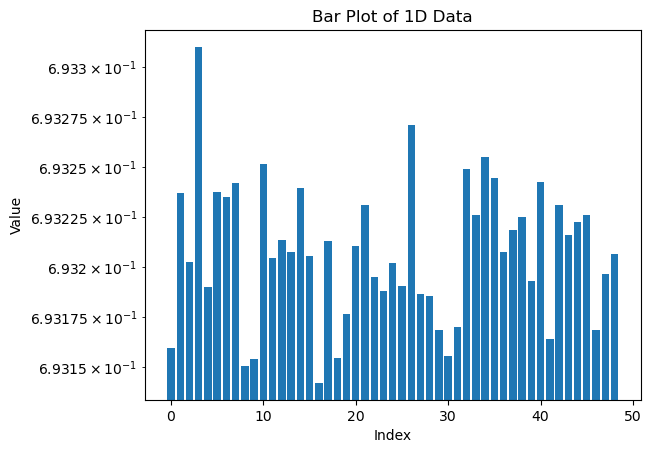

Z_phi el_pt_1 el_phi_3 el_phi_1 jet_pt_1 mu_eta_1 el_e_1


In [136]:
"""los = losses.iloc[0][:]
los = np.array(los)
arr = [np.array(names[1:46]), los[1:46]]
#los = pd.DataFrame([np.array(names[1:]), los], columns=['names', 'vals'])
#np.array(names).shape
#los.shape#names[1:].shape
los_arr = pd.DataFrame(arr)
plt.plot(np.linspace(0,len(los[1:]),len(los[1:])), los[1:])"""

d = pd.DataFrame(losses)
d[1]
plt.bar(range(len(d[1])), d[1])
plt.title('Bar Plot of 1D Data')
plt.yscale('log')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()
print(names[3], names[25], names[33], names[31], names[10], names[40], names[34])

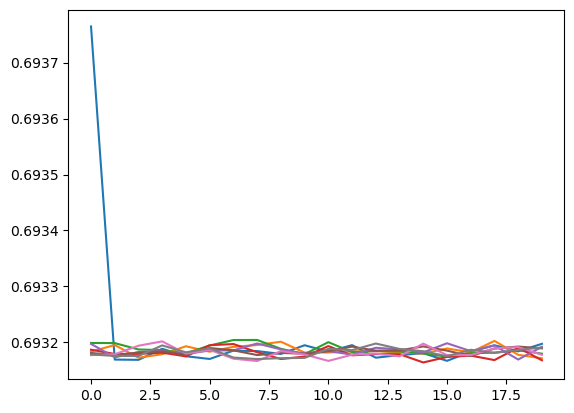

In [41]:
names =  X1.columns
model = Sequential()
model.add(Dense(X1[names[2]].shape[0], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(int(4), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(int(2), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
for i in range(2,10,1):
    history_temp =  model.fit(X1_train[names[i]], y1_train, epochs=20, validation_data=(X1_val[names[i]], y1_val), verbose=0)
    loss = history_temp.history
    plt.plot(loss['loss'])

# New Model Prediction from Selected Data

In [142]:
!git commit -m "selection criteria"

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Code.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [143]:
!git push

Everything up-to-date
